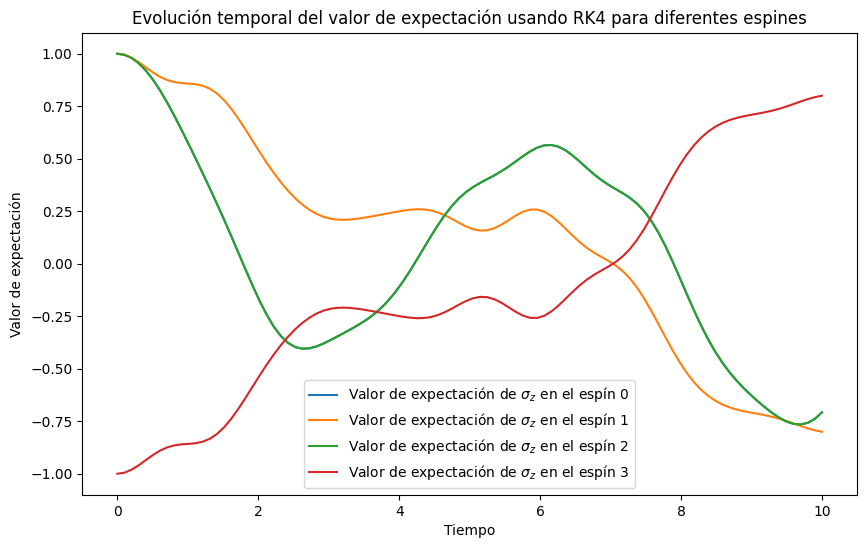

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las matrices de Pauli y otras constantes
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])
iden = np.eye(2)

def operacion(orden):
    """Calcula el producto de Kronecker de una lista de matrices."""
    producto = orden[0]
    for i in orden[1:]:
        producto = np.kron(producto, i)
    return producto

def hamiltonian(J, g, N):
    """Construye el Hamiltoniano del modelo de Ising con campo transversal."""
    spins = np.zeros((2**N, 2**N))
    field = np.zeros((2**N, 2**N))

    # Sumatoria de la parte de interacciones
    for i in range(N):
        j = (i + 1) % N  # Condición de periodicidad
        orden = [iden] * N
        orden[i] = sz
        orden[j] = sz
        elemento = operacion(orden)
        spins += elemento

    # Sumatoria de la parte del campo
    for i in range(N):
        orden = [iden] * N
        orden[i] = sx
        elemento = operacion(orden)
        field += elemento

    # Ecuación del Hamiltoniano de Ising
    H = -J * spins - g * field

    return H

def schrodinger_derivative(H, psi):
    """Calcula la derivada temporal de psi usando el Hamiltoniano H."""
    return -1j * H.dot(psi)

def rk4_step(H, psi, t, dt):
    """Realiza un paso del método RK4 para la ecuación de Schrödinger."""
    k1 = dt * schrodinger_derivative(H, psi)
    k2 = dt * schrodinger_derivative(H, psi + 0.5 * k1)
    k3 = dt * schrodinger_derivative(H, psi + 0.5 * k2)
    k4 = dt * schrodinger_derivative(H, psi + k3)
    return psi + (k1 + 2*k2 + 2*k3 + k4) / 6

def expectation_value(state, observable):
    """Calcula el valor de expectación del observable en el estado dado."""
    return np.dot(state.transpose().conjugate(), np.dot(observable, state)).real

def operador_z_n_espin(i, N):
    """Construye el operador sigma_z que actúa en el i-ésimo espín en una cadena de N espines."""
    operadores = [iden] * N  # Crear una lista de N matrices identidad
    operadores[i] = sz  # Reemplazar la i-ésima matriz identidad con sigma_z
    return operacion(operadores)  # Calcular el producto de Kronecker de todas las matrices

# Parámetros del sistema
N = 4  # Número de sitios en la cadena de espines
J = 1.0  # Parámetro de interacción ferromagnética
g = 0.5  # Parámetro del campo transversal

# Espines específicos para los cuales queremos medir el valor de expectación
espines = [0, 1, 2, 3]  # Lista de índices de espines

# Construcción del Hamiltoniano
H = hamiltonian(J, g, N)

# Definición del estado inicial |0000>
psi_0 = np.zeros(2**N, dtype=complex)
psi_0[1] = 1

# Tiempo de evolución y paso de tiempo
times = np.linspace(0, 10, 100)
dt = times[1] - times[0]  # Suponiendo que los tiempos son equidistantes

# Evolución del estado en cada tiempo y almacenamiento de los valores de expectación
plt.figure(figsize=(10, 6))

for i in espines:
    observable = operador_z_n_espin(i, N)
    expectation_values = np.zeros(len(times))
    psi = psi_0.copy()
    for idx, t in enumerate(times):
        expectation_values[idx] = expectation_value(psi, observable)
        psi = rk4_step(H, psi, t, dt)
    plt.plot(times, expectation_values, label=f'Valor de expectación de $\\sigma_z$ en el espín {i}')

plt.xlabel('Tiempo')
plt.ylabel('Valor de expectación')
plt.title(f'Evolución temporal del valor de expectación usando RK4 para diferentes espines')
plt.legend()
plt.show()

